In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('ggplot')

Reading in the data: we use sample variance of half of the fifty random samples 

In [2]:
df = pd.read_csv('../Data\ICTO_Datasets\ICTO_Giving_2018-2019.csv').sample(frac=0.5)

Explore the data: look at things such as the size of the dataset, the statistics on the data, data types of each column, and the data itself 

In [3]:
df.head()

,DonorAccountId,MemberAccountId,FundId,FundGroup,GiftDate,GiftAmt
1414382,4018566621127843367,4.019447e+18,123472392523114029,Member,2019-04-15,100.0
1306188,4022455563120090716,4.023370e+18,123472353834789933,Member,2019-03-10,50.0
513809,4022470324704583252,4.022470e+18,123472383899495463,Member,2018-06-20,40.0
1258612,4019445319108468308,4.022465e+18,123472379587750948,Member,2019-02-21,185.0
497049,4018567933844332112,4.023334e+18,123472388177358373,Member,2018-06-15,100.0


In [4]:
df.shape

(866768, 6)

In [5]:
df.describe()

,DonorAccountId,MemberAccountId,FundId,GiftAmt
count,8.667680e+05,8.022930e+05,8.667680e+05,8.667680e+05
mean,4.218709e+18,4.038726e+18,1.234718e+17,2.192911e+02
std,7.869910e+17,1.976432e+17,1.948244e+12,3.869782e+03
min,3.499228e+18,3.528001e+18,1.234647e+17,1.000000e-02
25%,4.019374e+18,4.022463e+18,1.234724e+17,3.500000e+01
50%,4.022466e+18,4.023335e+18,1.234724e+17,6.000000e+01
75%,4.023362e+18,4.023348e+18,1.234724e+17,1.350000e+02
max,8.924426e+18,8.924116e+18,1.234790e+17,2.500000e+06


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 866768 entries, 1414382 to 1628765
Data columns (total 6 columns):
DonorAccountId     866768 non-null int64
MemberAccountId    802293 non-null float64
FundId             866768 non-null int64
FundGroup          866416 non-null object
GiftDate           866768 non-null object
GiftAmt            866768 non-null float64
dtypes: float64(2), int64(2), object(2)
memory usage: 46.3+ MB


In [7]:
df.columns

Index(['DonorAccountId', 'MemberAccountId', 'FundId', 'FundGroup', 'GiftDate',
       'GiftAmt'],
      dtype='object')

First step in data cleaning: checking for null values and dropping them

In [8]:
pd.isnull(df).head()

,DonorAccountId,MemberAccountId,FundId,FundGroup,GiftDate,GiftAmt
1414382,False,False,False,False,False,False
1306188,False,False,False,False,False,False
513809,False,False,False,False,False,False
1258612,False,False,False,False,False,False
497049,False,False,False,False,False,False


In [9]:
df.isnull().sum()

DonorAccountId         0
MemberAccountId    64475
FundId                 0
FundGroup            352
GiftDate               0
GiftAmt                0
dtype: int64

Looking at the data there are many null values, we will drop them with this command

In [10]:
df.dropna(inplace = True)

In [11]:
df.shape

(802293, 6)

In [12]:
print("Null Values")
print(df.isnull().sum()) # checking again for null values
print()
print("Na Values")
print(df.isna().sum()) # also checking for na values

Null Values
DonorAccountId     0
MemberAccountId    0
FundId             0
FundGroup          0
GiftDate           0
GiftAmt            0
dtype: int64

Na Values
DonorAccountId     0
MemberAccountId    0
FundId             0
FundGroup          0
GiftDate           0
GiftAmt            0
dtype: int64


Second Step: check for outliers in the data
-Outliers are great for training an ML model but if they are to far away from 
the median or mean of the data it can throw of our training process

In [13]:
df.head(10)

,DonorAccountId,MemberAccountId,FundId,FundGroup,GiftDate,GiftAmt
1414382,4018566621127843367,4.019447e+18,123472392523114029,Member,2019-04-15,100.0
1306188,4022455563120090716,4.023370e+18,123472353834789933,Member,2019-03-10,50.0
513809,4022470324704583252,4.022470e+18,123472383899495463,Member,2018-06-20,40.0
1258612,4019445319108468308,4.022465e+18,123472379587750948,Member,2019-02-21,185.0
497049,4018567933844332112,4.023334e+18,123472388177358373,Member,2018-06-15,100.0
1524199,4023363982744165968,4.023346e+18,123472383748368684,Member,2019-05-20,25.0
1642081,4019393642431061584,4.019361e+18,123472383815739683,Member,2019-07-03,50.0
583410,4018515093666995796,4.019460e+18,123471288699479589,Member,2018-07-13,200.0
814671,4018578745552084519,4.023348e+18,123472353817816358,Member,2018-10-02,1200.0
327921,7345045652219436634,4.023346e+18,123472379470114597,Member,2018-04-19,300.0


In [14]:
# print("GiftAmt")
print(df['GiftAmt'].value_counts().head())
print(df['GiftAmt'].value_counts().tail())
# df['GiftAmt'].value_counts()

50.0     152006
100.0    121799
25.0      79447
200.0     37293
20.0      35874
Name: GiftAmt, dtype: int64
887.25    1
718.43    1
64.67     1
186.88    1
268.73    1
Name: GiftAmt, dtype: int64


In [15]:
# print("GiftDate")
print(df['GiftDate'].value_counts().head())
print(df['GiftDate'].value_counts().tail())
# df['GiftDate'].value_counts()

2018-09-10    8983
2018-12-10    8376
2019-06-10    8059
2018-05-10    7688
2018-01-10    7466
Name: GiftDate, dtype: int64
2018-01-27    256
2019-08-06    198
2019-03-31    186
2019-08-07    169
2018-03-31    143
Name: GiftDate, dtype: int64


In [16]:
# Get the 98th and 2nd percentile as the limits of our outliers
upper_limit = np.percentile(df.GiftAmt.values, 98) 
lower_limit = np.percentile(df.GiftAmt.values, 2) 
# Filter the outliers from the dataframe

df['GiftAmt'].loc[df['GiftAmt']>upper_limit] = upper_limit
df['GiftAmt'].loc[df['GiftAmt']<lower_limit] = lower_limit

C:\Users\craig\Desktop\Anaconda\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


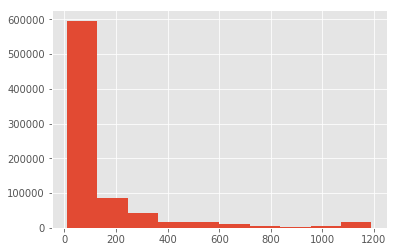

In [17]:
plt.hist(df['GiftAmt'], bins=10, histtype='bar')
# plt.hist(df['GiftDate'],bins=10, histtype='bar')
plt.show()

In [18]:
df['GiftAmt'].mean()

147.43221594853458

In [19]:
df['GiftAmt'].median()

60.0

Create a scatter chart with a line going through the middle that is the mean 

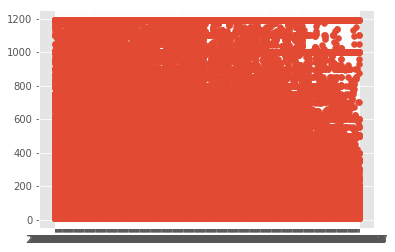

In [20]:
plt.scatter(df['GiftDate'], df['GiftAmt'])
plt.show()

In [21]:
Dates = pd.Series(df['GiftDate'].sample(frac=0.5))
Amount = pd.Series(df['GiftAmt'].sample(frac=0.5))
plt.plot(Dates, Amount, color='red', marker='o')
plt.show()

OverflowError: Exceeded cell block limit (set 'agg.path.chunksize' rcparam)

<Figure size 432x288 with 1 Axes>

In [22]:
# plt.bar(df['GiftAmt'], df['GiftDate'])
# plt.show()

Third Step: check for duplicates and bad values in the data

In [23]:
sum(df.duplicated()) # duplicates found

3676

In [24]:
df.drop_duplicates(inplace = True)
sum(df.duplicated())

0

In [25]:
df.columns

Index(['DonorAccountId', 'MemberAccountId', 'FundId', 'FundGroup', 'GiftDate',
       'GiftAmt'],
      dtype='object')

In [26]:
df['FundGroup'].value_counts().head()

Member          796628
Paid Staff        1469
Wycliffe USA       358
Volunteer          162
Name: FundGroup, dtype: int64

In [27]:
df['GiftDate'].value_counts().head()

2018-09-10    8894
2018-12-10    8304
2019-06-10    8002
2018-05-10    7637
2018-01-10    7444
Name: GiftDate, dtype: int64

In [28]:
df['GiftAmt'].value_counts().head()

50.0     152006
100.0    121799
25.0      79447
200.0     37293
20.0      35874
Name: GiftAmt, dtype: int64

In [29]:
# Convert the data to string instead of object for data analysis
df['FundGroup'] = df['FundGroup'].astype('str')
df['GiftDate'] = df['GiftDate'].astype('str')

In [30]:
# df = df.drop(['DonorAccountId', 'MemberAccountId'], axis=1)
df.head()

,DonorAccountId,MemberAccountId,FundId,FundGroup,GiftDate,GiftAmt
1414382,4018566621127843367,4.019447e+18,123472392523114029,Member,2019-04-15,100.0
1306188,4022455563120090716,4.023370e+18,123472353834789933,Member,2019-03-10,50.0
513809,4022470324704583252,4.022470e+18,123472383899495463,Member,2018-06-20,40.0
1258612,4019445319108468308,4.022465e+18,123472379587750948,Member,2019-02-21,185.0
497049,4018567933844332112,4.023334e+18,123472388177358373,Member,2018-06-15,100.0


Fourth Step: Drop Irrelevant Features

In [31]:
df.drop(['DonorAccountId', 'MemberAccountId', 'FundId'], axis=1, inplace=True)

In [32]:
df.head()

,FundGroup,GiftDate,GiftAmt
1414382,Member,2019-04-15,100.0
1306188,Member,2019-03-10,50.0
513809,Member,2018-06-20,40.0
1258612,Member,2019-02-21,185.0
497049,Member,2018-06-15,100.0


Checking from the value counts the data seems to be standardized

Creating an Index column for all of the new data from 0 to last row

In [33]:
# df['Index'] = df.iloc[0]

In [34]:
# df.set_index(df['Index']).head()

In [35]:
# df['Index'] = pd.Series(range(0,df.shape[0]))
# df['Index'] = pd.Series(range(0, len(df['FundId'])))
# df['Index'].head()

In [36]:
# print(df.shape[0])

In [37]:
# df.set_index(df['Index']).head()

In [38]:
# df.head()

Reading out the cleaned dataset into a new csv file

In [39]:
df.to_csv('../Data/ICTO_Datasets/cleaned_ICTO_Giving_2018-2019.csv')